In [1]:
#/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
def clean_df(data):
    data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
    data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
    data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)
    return data

In [6]:
df = clean_df(df)

In [7]:
def get_splits(data):
    
    x = df.drop(columns=['Exited'])
    y=df['Exited'].values 
    
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y)
    
    sc = StandardScaler()
    xtrain_ft = sc.fit_transform(xtrain)
    xtest_t = sc.transform(xtest)
    
    return xtrain_ft,xtest_t,ytrain,ytest

In [8]:
xtrain_ft,xtest_t,ytrain,ytest = get_splits(df)

In [9]:
def create_custom_model(input_dim, hidden_units=(128, 64, 32), dropout_rate=0.5):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hidden_units[0], activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    
    # Hidden layers
    for units in hidden_units[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    return model

input_dim = 11
model = create_custom_model(input_dim)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [10]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(xtrain_ft,ytrain,batch_size=50,epochs=125,verbose=1,validation_split=0.2)

Epoch 1/125
128/128 [==============================] - 6s 5ms/step - loss: 0.5121 - accuracy: 0.7916 - val_loss: 0.4514 - val_accuracy: 0.7887
Epoch 2/125
128/128 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7973 - val_loss: 0.4464 - val_accuracy: 0.7925
Epoch 3/125
128/128 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.8055 - val_loss: 0.4353 - val_accuracy: 0.8037
Epoch 4/125
128/128 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8012 - val_loss: 0.4286 - val_accuracy: 0.8206
Epoch 5/125
128/128 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8059 - val_loss: 0.4178 - val_accuracy: 0.8331
Epoch 6/125
128/128 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8128 - val_loss: 0.4082 - val_accuracy: 0.8400
Epoch 7/125
128/128 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8195 - val_loss: 0.3994 - val_accuracy: 0.8456

In [11]:
def evaluate_and_plot(model, x_test, y_test, history):
    # Predictions
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Plotting training history
    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    return accuracy

63/63 [==============================] - 0s 1ms/step
Accuracy: 0.859


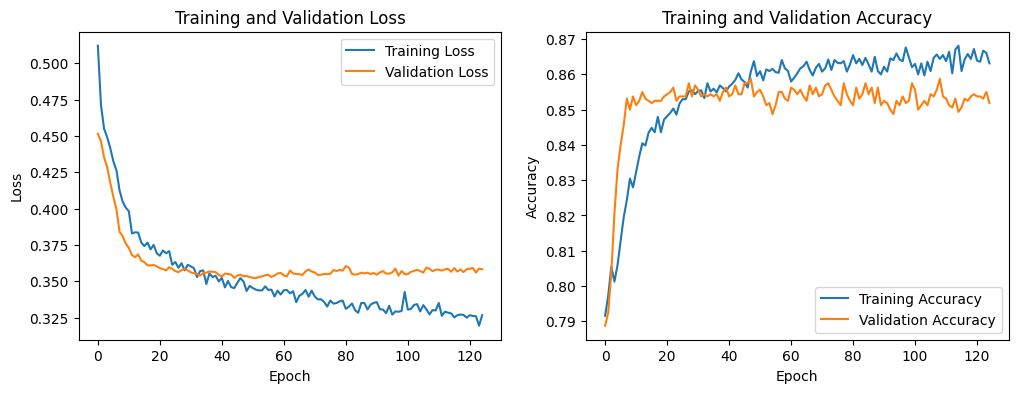

In [12]:
accuracy = evaluate_and_plot(model, xtest_t, ytest, history)